In [1]:
from pathlib import Path
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from functions import conv_eng_si, pws_vw_ir, pws_vw_bcr, pws_vw_ira, pwd_vf_ir, pwd_vf_uf

# Path

In [3]:
cwd=Path.cwd()

# Vertical Well in infinity reservoir 

## Pressure Build-up example

Using the principle of superposition in the equation for vertical well in infinity reservoir:
$$ p_\mathrm{ws} = p_\mathrm{i} + \dfrac{q\mu B}{4\pi k h} \left[ \mathrm{Ei} \left( -\dfrac{\phi \mu c r^2}{4k \left( t + \Delta t \right)} \right) - \mathrm{Ei} \left( -\dfrac{\phi \mu c r^2}{4k \left(\Delta t \right)} \right) \right]$$ 

In [4]:
table_vw_ir_rdat=pd.read_csv(cwd/"Example_vw_ir_CB-161_rdata.csv")
table_vw_ir_build=pd.read_csv(cwd/"Example_vw_ir_CB-161_build.csv")

In [5]:
converted_values = []
converted_units = []
table_vw_ir_rdat_si=table_vw_ir_rdat.copy()

for index, row in table_vw_ir_rdat_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vw_ir_rdat_si['Value'] = converted_values
table_vw_ir_rdat_si['Unit'] = converted_units

table_vw_ir_build_si=table_vw_ir_build.copy()
table_vw_ir_build_si["delta_t"],_=conv_eng_si(table_vw_ir_build_si["delta_t"],"h")
table_vw_ir_build_si["pws"],_=conv_eng_si(table_vw_ir_build_si["pws"],"psi")

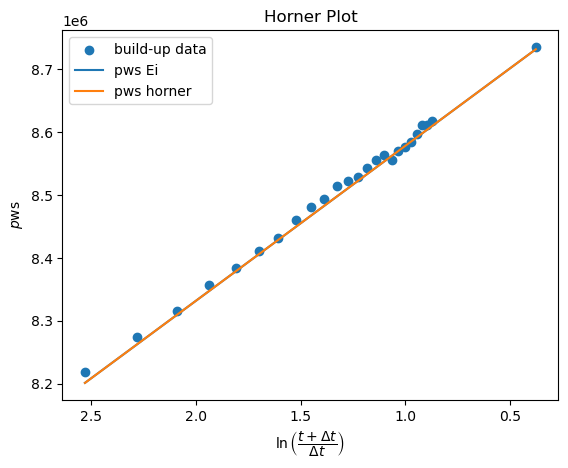

In [6]:
fig1, ax1= plt.subplots()
x_data=np.log(table_vw_ir_build_si["t_dt"])
ax1.scatter(x_data,table_vw_ir_build_si["pws"],label="build-up data")
ax1.invert_xaxis()

ax1.set_title("Horner Plot")
ax1.set_xlabel(r"$\ln \left( \dfrac{t + \Delta t}{\Delta t} \right)$")
ax1.set_ylabel("$p$ws")

k=1.57e-13

pws=pws_vw_ir(table_vw_ir_rdat_si,table_vw_ir_build_si,k)
ax1.plot(x_data,pws,label="pws Ei ")

pwsh=pws_vw_ira(table_vw_ir_rdat_si,table_vw_ir_build_si,k)
ax1.plot(x_data,pwsh,label="pws horner")

plt.legend()

plt.show()



# Vertical well in bounded reservoir

## Pressure Build-up example (synthetic)

Using the principle of superposition in the equation for vertical well in infinity circular bounded with no flow equation:
$$ p_\mathrm{ws} = p_\mathrm{i} - \dfrac{q\mu B}{4\pi k h} \left\{ p_\mathrm{wD} \left( t + \Delta t \right) - p_\mathrm{wD} \left( \Delta t \right) \right\} $$ \
With $t$ as the producing time before shut in and $\Delta t$ the time of the shut in and,

$$ p_\mathrm{wD} \left(  t + \Delta t \right) = \dfrac{4k \left( t + \Delta t\right)}{\phi \mu c R_{\mathrm{b}}^{2}} + \dfrac{r_{\mathrm{w}}^{2}}{R_{\mathrm{b}}^{2}} -2 \ln \dfrac{r_\mathrm{w}}{R_\mathrm{b} } -\frac{3}{2}-4 \sum_{n=1}^{\infty} \dfrac{J_0 \left( \mathcal{X}_n \dfrac{r_\mathrm{w}}{R_\mathrm{b}} \right) \exp \left( -\mathcal{X}_{n}^{2} \dfrac{4k \left( t + \Delta t\right)}{\phi \mu c R_{\mathrm{b}}^{2}} \right)}{ \mathcal{X}_{n}^{2} J_0 \left( \mathcal{X}_n \right)} $$

$$ p_\mathrm{wD} \left(    \Delta t \right) = \dfrac{4k \left(   \Delta t\right)}{\phi \mu c R_{\mathrm{b}}^{2}} + \dfrac{r_{\mathrm{w}}^{2}}{R_{\mathrm{b}}^{2}} -2 \ln \dfrac{r_\mathrm{w}}{R_\mathrm{b} } -\frac{3}{2}-4 \sum_{n=1}^{\infty} \dfrac{J_0 \left( \mathcal{X}_n \dfrac{r_\mathrm{w}}{R_\mathrm{b}} \right) \exp \left( -\mathcal{X}_{n}^{2} \dfrac{4k \left(   \Delta t\right)}{\phi \mu c R_{\mathrm{b}}^{2}} \right)}{ \mathcal{X}_{n}^{2} J_0 \left( \mathcal{X}_n \right)} $$

In [6]:
table_vw_bcr_rdat=pd.read_csv(cwd/"Example_vw_bcr_CB-161_rdata.csv")

In [7]:
converted_values = []
converted_units = []
table_vw_bcr_rdat_si=table_vw_bcr_rdat.copy()

for index, row in table_vw_bcr_rdat_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vw_bcr_rdat_si['Value'] = converted_values
table_vw_bcr_rdat_si['Unit'] = converted_units

In [8]:
k=1.57e-13
pws=pws_vw_bcr(
    table_vw_bcr_rdat_si,
    table_vw_ir_build_si,
    k=k
)


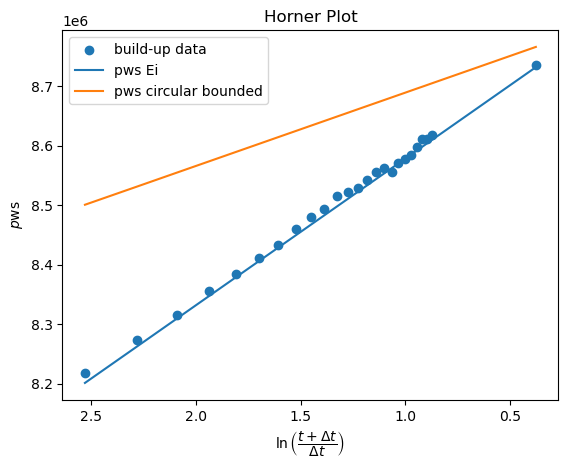

In [9]:
fig2, ax1= plt.subplots()
x_data=np.log(table_vw_ir_build_si["t_dt"])
ax1.scatter(x_data,table_vw_ir_build_si["pws"],label="build-up data")
ax1.invert_xaxis()

ax1.set_title("Horner Plot")
ax1.set_xlabel(r"$\ln \left( \dfrac{t + \Delta t}{\Delta t} \right)$")
ax1.set_ylabel("$p$ws")

k=1.57e-13

pws=pws_vw_ir(table_vw_ir_rdat_si,table_vw_ir_build_si,k)
ax1.plot(x_data,pws,label="pws Ei ")

pwsc=pws_vw_bcr(
    table_vw_bcr_rdat_si,
    table_vw_ir_build_si,
    k=k
)
ax1.plot(x_data,pwsc,label="pws circular bounded")

plt.legend()

plt.show()

# Vertical Fracture with Infinite Conductivity

In [22]:
table_vf_ic_rp=pd.read_csv(cwd/"Example_vf_ic_t1_rp.csv")
table_vf_ic_rd=pd.read_csv(cwd/"Example_vf_ic_t1_rd.csv")

## Graph

In [80]:
from scipy import special as sc
import matplotlib.ticker as ticker

In [36]:
test=pd.read_csv(cwd/"td_pd.csv",sep=";",decimal=",")

In [121]:
td=np.logspace(-2,4)
pwd=np.sqrt(np.pi*td)*sc.erf(1/(2*np.sqrt(td))) - 0.5*sc.expi(-1/(4*td))
td=np.log10(td)
pwd=np.log10(pwd)

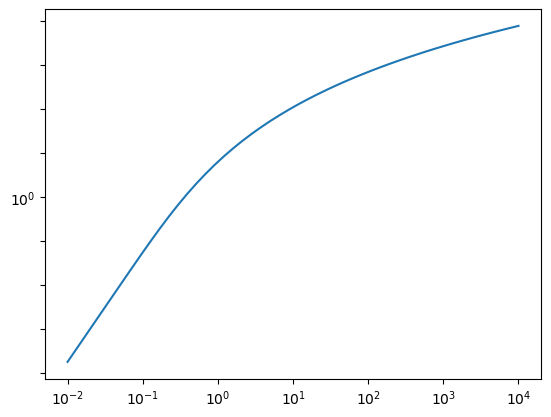

In [174]:
def log_tick_formatter(x, pos):
    if x == int(x):
        return f'$10^{{{int(x)}}}$'
    else:
        # Return empty string or a rounded float for minor marks, depending on preference
        return '' 
        # Or: return f'$10^{{{x:.1f}}}$'
fig=plt.subplot()
fig.plot(td,pwd)
fig.xaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))
fig.yaxis.set_major_formatter(ticker.FuncFormatter(log_tick_formatter))
plt.pause(1)

In [57]:
td=test["td"]
pwd=0.5*np.sqrt(np.pi*td)*( sc.erf(0.134/np.sqrt(td)) + sc.erf(0.866/np.sqrt(td))  ) - 0.067*sc.expi(-0.018/(td)) - 0.433*sc.expi(-0.750/(td))


### Converting values

Convert values when intial values are in US-Eng system of units

In [7]:
converted_values = []
converted_units = []
table_vf_ic_rp_si=table_vf_ic_rp.copy()

for index, row in table_vf_ic_rp_si.iterrows():
    si_value, si_unit = conv_eng_si(row['Value'], row['Unit'])
    converted_values.append(si_value)
    converted_units.append(si_unit)
    
table_vf_ic_rp_si['Value'] = converted_values
table_vf_ic_rp_si['Unit'] = converted_units

table_vf_ic_rd_si=table_vf_ic_rd.copy()
table_vf_ic_rd_si["delta_t"],_=conv_eng_si(table_vf_ic_rd_si["delta_t"],"h")
table_vf_ic_rd_si["pws_pwf"],_=conv_eng_si(table_vf_ic_rd_si["pws_pwf"],"psi")
table_vf_ic_rd_si["pws"],_=conv_eng_si(table_vf_ic_rd_si["pws"],"psi")

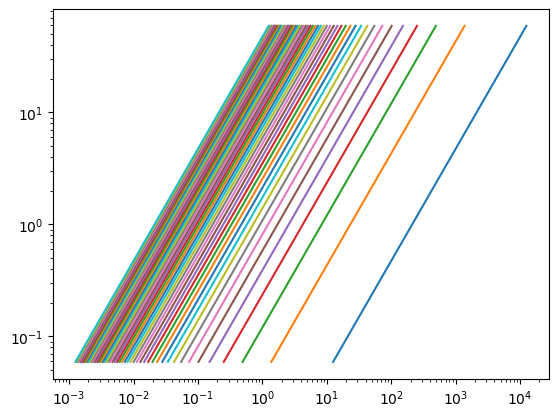

In [11]:
##SI
for i in range(len(b)):
    plt.plot(d[i],c)
plt.xscale("log")
plt.yscale("log")
plt.pause(1)